# UAS IF4D
**Nama: Intan Aulia Majid**  
**NIM: 230411100001**  
**Mata Kuliah: Penambangan Data**

## **DATA PASIEN HATI INDIA (Indian Liver Patient Dataset)**

## Data Understanding
Sumber Data
Dataset diambil dari link dibawah ini:

https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset

**Tujuan Dataset**  
Dataset Indian Liver Patient digunakan untuk membangun model klasifikasi yang mampu memprediksi apakah seorang pasien menderita penyakit hati (liver disease) atau tidak, berdasarkan parameter medis seperti usia, jenis kelamin, kadar bilirubin, enzim hati, protein total, dan lain-lain. Tujuannya adalah untuk membantu diagnosis dini penyakit hati, mengevaluasi performa algoritma machine learning dalam klasifikasi medis, serta mendukung penelitian dan pengembangan sistem cerdas di bidang kesehatan.

**Keterkaitan Fitur-Fitur dalam ILPD :**  
1. Age (Usia)  
Risiko penyakit hati meningkat seiring bertambahnya usia. Usia yang lebih tua sering berkorelasi dengan penurunan fungsi organ, termasuk hati.

2. Gender (Jenis Kelamin)  
Beberapa penyakit hati lebih sering terjadi pada pria (misalnya: sirosis alkoholik), sedangkan lainnya mungkin lebih banyak menyerang wanita. Jenis kelamin bisa memengaruhi pola konsumsi alkohol, hormon, dan respons imun.  

3. Total Bilirubin  
Bilirubin adalah produk samping pemecahan sel darah merah. Kadar tinggi menandakan masalah pada hati dalam memproses dan membuang bilirubin — gejala umum penyakit hati, terutama hepatitis.  

4. Direct Bilirubin  
Merupakan bentuk terkonjugasi dari bilirubin. Peningkatan nilai ini menunjukkan adanya obstruksi atau kerusakan saluran empedu, yang umum dalam penyakit hati.  

5. Alkaline Phosphatase (ALP)  
Enzim yang meningkat bila terjadi gangguan pada saluran empedu dan kerusakan jaringan hati. Nilai tinggi dapat menjadi penanda adanya penyakit hati kolestatik.  

6. Alanine Aminotransferase (SGPT/ALT)  
Enzim ini dilepaskan ke dalam darah saat sel-sel hati rusak. Merupakan indikator utama kerusakan hati akut atau kronis.  

7. Aspartate Aminotransferase (SGOT/AST)  
Mirip dengan ALT, namun juga ditemukan pada jantung dan otot. Kadar tinggi sering terlihat pada hepatitis, sirosis, dan penyakit hati alkoholik.  

8. Total Proteins  
Mengukur jumlah total protein dalam darah, termasuk albumin dan globulin. Hati yang sehat memproduksi banyak protein, sehingga nilainya bisa menurun jika hati rusak.  

9. Albumin  
Protein utama yang diproduksi oleh hati. Jika hati rusak, kemampuan produksinya menurun, sehingga kadar albumin bisa rendah.  

10. Albumin and Globulin Ratio (A/G Ratio)  
Rasio antara albumin dan globulin. Ketidakseimbangan rasio ini (terutama rasio rendah) bisa menjadi indikasi gangguan fungsi hati atau penyakit inflamasi kronis.  

11. Dataset Column (Output)  
Kolom target yang menunjukkan apakah pasien menderita penyakit liver (1) atau tidak (2). Semua fitur di atas digunakan untuk memprediksi nilai ini.  

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ucimlrepo import fetch_ucirepo 
ilpd_indian_liver_patient_dataset = fetch_ucirepo(id=225) 
X = ilpd_indian_liver_patient_dataset.data.features 
y = ilpd_indian_liver_patient_dataset.data.targets 

print(ilpd_indian_liver_patient_dataset.metadata) 
print(ilpd_indian_liver_patient_dataset.variables) 

{'uci_id': 225, 'name': 'ILPD (Indian Liver Patient Dataset)', 'repository_url': 'https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/225/data.csv', 'abstract': 'Death by liver cirrhosis continues to increase, given the increase in alcohol consumption rates, chronic hepatitis infections, and obesity-related liver disease. Notwithstanding the high mortality of this disease, liver diseases do not affect all sub-populations equally. The early detection of pathology is a determinant of patient outcomes, yet female patients appear to be marginalized when it comes to early diagnosis of liver pathology. \nThe dataset comprises 584 patient records collected from the NorthEast of Andhra Pradesh, India.\nThe prediction task is to determine whether a patient suffers from liver disease based on the information about several biochemical markers, including albumin and other enzymes required for metabolism.\n', 'area': 'He

**Import dan Load Data**

Pertama, kita akan memuat dataset ke dalam DataFrame pandas.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Indian Liver Patient Dataset (ILPD).csv"
df = pd.read_csv(file_path)

**Menampilkan Info Data**

In [8]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   65      582 non-null    int64  
 1   Female  582 non-null    object 
 2   0.7     582 non-null    float64
 3   0.1     582 non-null    float64
 4   187     582 non-null    int64  
 5   16      582 non-null    int64  
 6   18      582 non-null    int64  
 7   6.8     582 non-null    float64
 8   3.3     582 non-null    float64
 9   0.9     578 non-null    float64
 10  1       582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB
None
   65 Female   0.7  0.1  187  16   18  6.8  3.3   0.9  1
0  62   Male  10.9  5.5  699  64  100  7.5  3.2  0.74  1
1  62   Male   7.3  4.1  490  60   68  7.0  3.3  0.89  1
2  58   Male   1.0  0.4  182  14   20  6.8  3.4  1.00  1
3  72   Male   3.9  2.0  195  27   59  7.3  2.4  0.40  1
4  46   Male   1.8  0.7  208  19   14  7.6  4.4  1.30  1


**Visualisasi Data**

Histogram Fitur Numerik (Distribusi Data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               583 non-null    int64  
 1   Gender            583 non-null    object 
 2   Urea              583 non-null    float64
 3   Creatinine        583 non-null    float64
 4   Hemoglobin        583 non-null    int64  
 5   WBC               583 non-null    int64  
 6   RBC               583 non-null    int64  
 7   pH                583 non-null    float64
 8   Specific Gravity  583 non-null    float64
 9   Protein           579 non-null    float64
 10  Class             583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None
              Age        Urea  Creatinine   Hemoglobin          WBC  \
count  583.000000  583.000000  583.000000   583.000000   583.000000   
mean    44.746141    3.298799    1.486106   290.576329    80.713551   
std

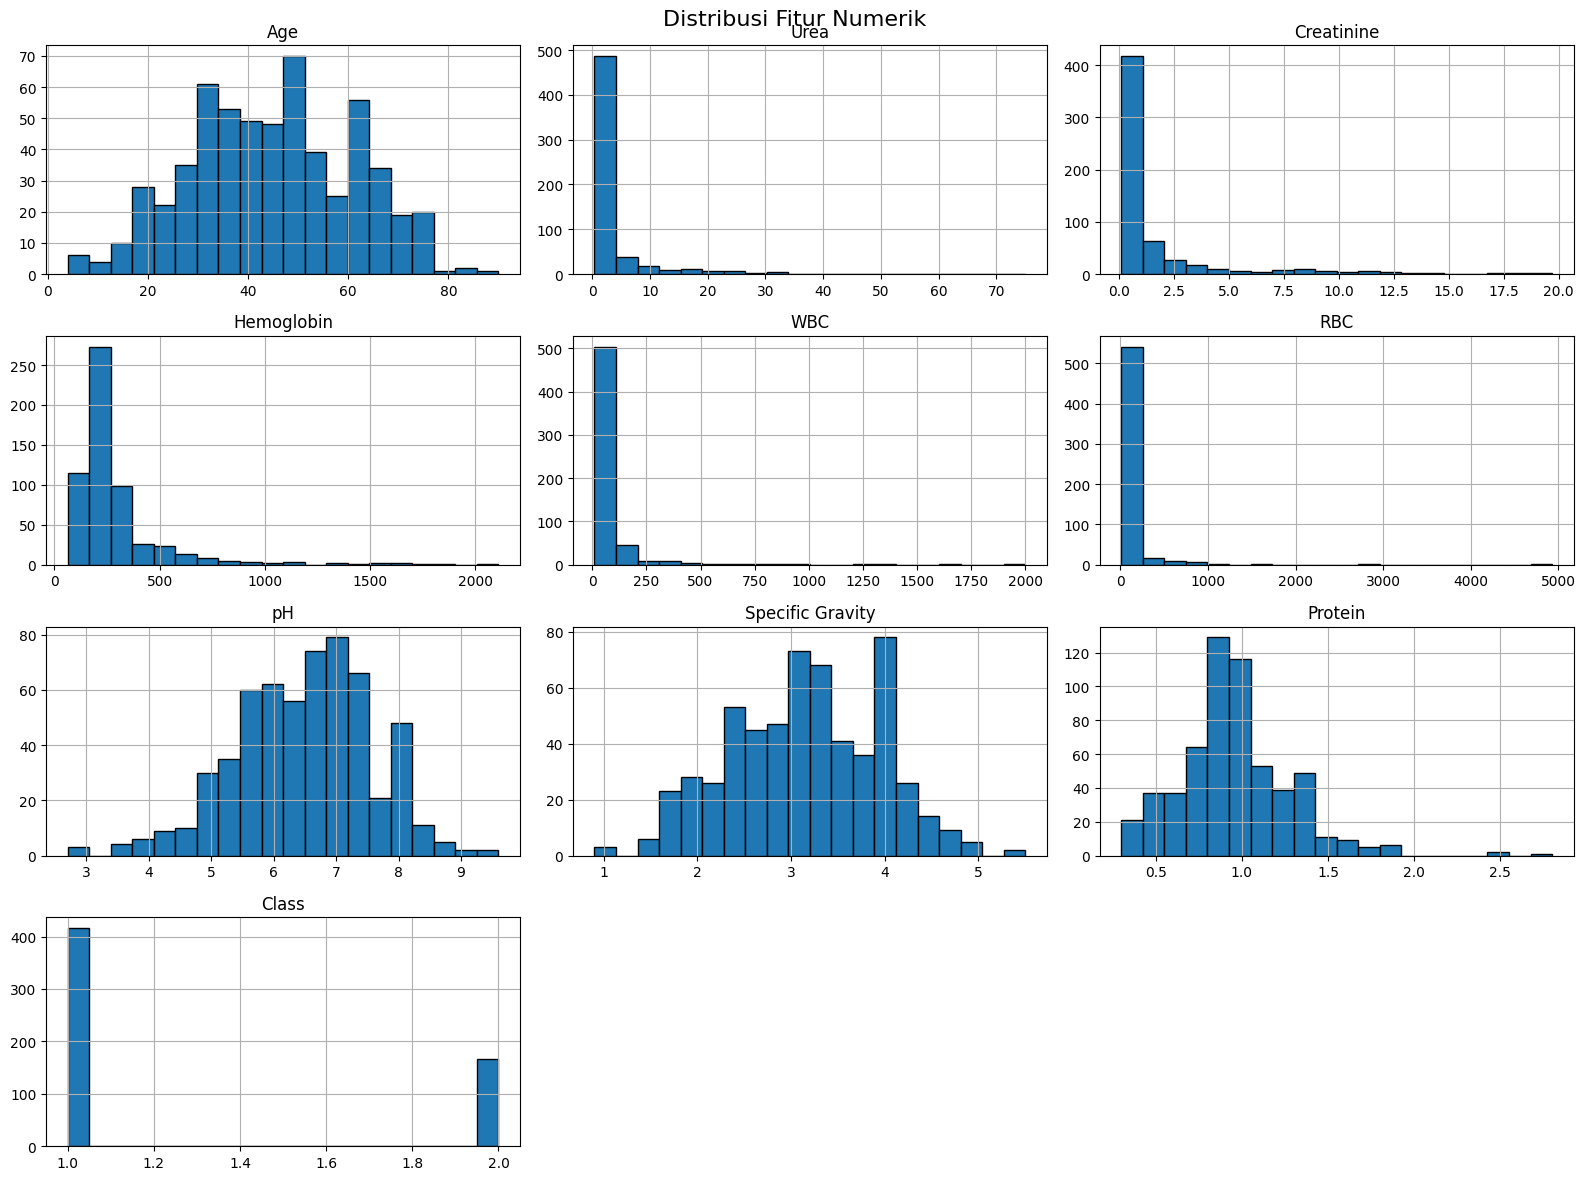

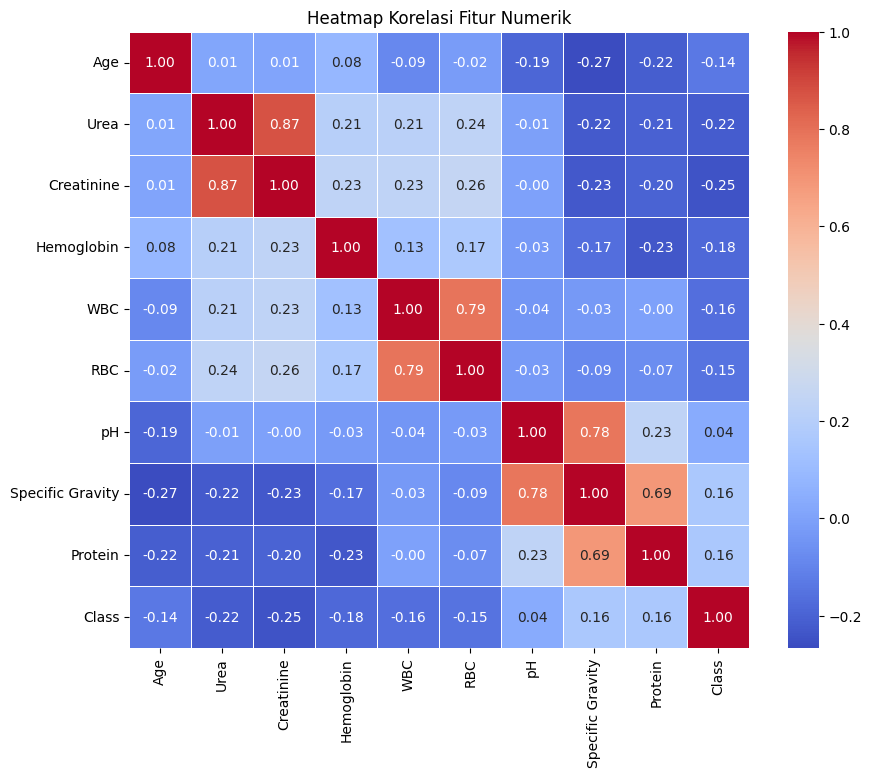

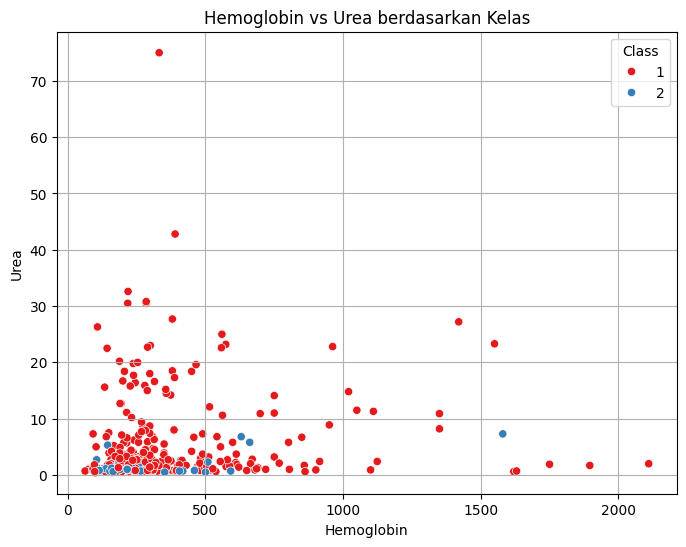

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Indian Liver Patient Dataset (ILPD).csv'
df = pd.read_csv(file_path, header=None)

df.columns = [
    "Age", "Gender", "Urea", "Creatinine", "Hemoglobin", "WBC", "RBC",
    "pH", "Specific Gravity", "Protein", "Class"
]

for col in df.columns:
    if col != "Gender":
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.info())
print(df.describe())

numeric_df = df.select_dtypes(include=[np.number])
numeric_df.hist(bins=20, figsize=(16, 12), edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

plt.figure(figsize=(10, 8))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Hemoglobin', y='Urea', hue='Class', palette='Set1')
plt.title("Hemoglobin vs Urea berdasarkan Kelas")
plt.xlabel("Hemoglobin")
plt.ylabel("Urea")
plt.legend(title="Class")
plt.grid(True)
plt.show()


**Missing values**

In [ ]:
missing_counts = df.isnull().sum()
print(missing_counts)

total_missing = missing_counts.sum()
print(f"\nTotal missing values di seluruh dataset: {total_missing}")

Age                 0
Gender              0
Urea                0
Creatinine          0
Hemoglobin          0
WBC                 0
RBC                 0
pH                  0
Specific Gravity    0
Protein             4
Class               0
dtype: int64

Total missing values di seluruh dataset: 4


**Visualisasi Missing Values (Heatmap)**

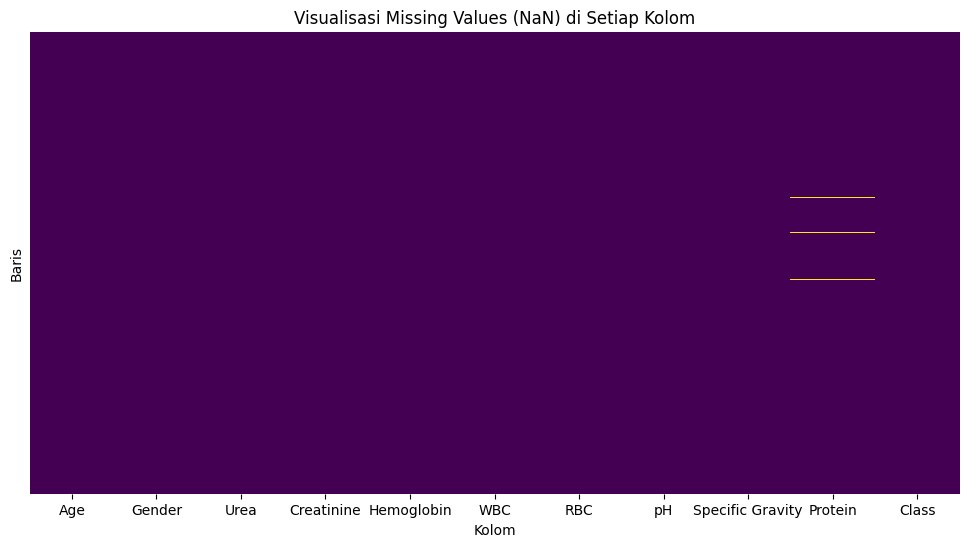

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Visualisasi Missing Values (NaN) di Setiap Kolom")
plt.xlabel("Kolom")
plt.ylabel("Baris")
plt.show()

**Boxplot Fitur Numerik (Deteksi Outlier)**

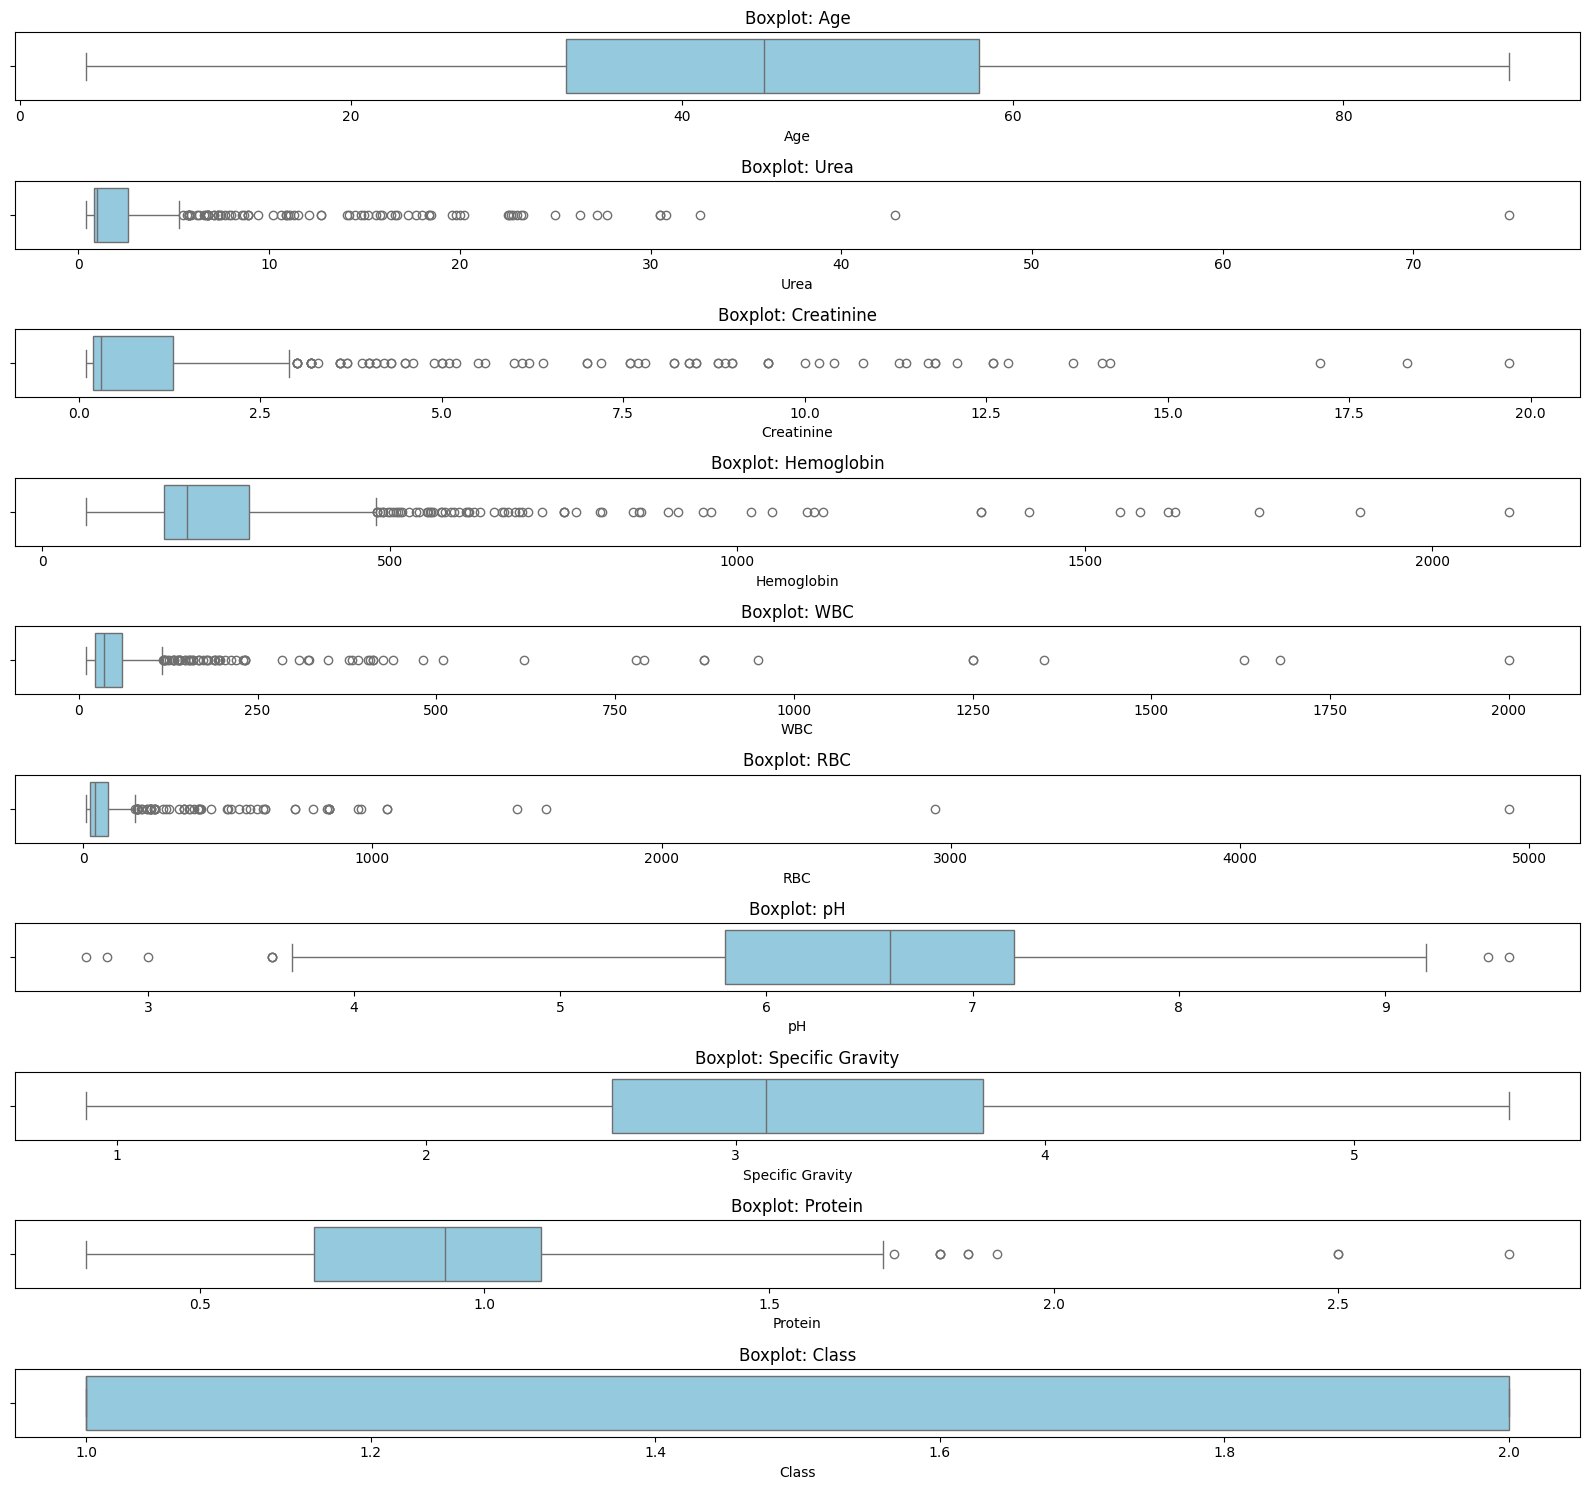

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(16, len(numeric_df.columns)*1.5))
for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(len(numeric_df.columns), 1, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

plt.show()

## Pre-processing Data

**Tangani Missing Values**

In [ ]:
import pandas as pd

df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv", header=None)

df.columns = [
    "Age", "Gender", "Urea", "Creatinine", "Hemoglobin", "WBC", "RBC",
    "pH", "Specific Gravity", "Protein", "Class"
]

for col in df.columns:
    if col != "Gender":
        df[col] = pd.to_numeric(df[col], errors='coerce')

numerik = df.select_dtypes(include='number').columns
kategori = df.select_dtypes(include='object').columns

df[numerik] = df[numerik].fillna(df[numerik].median())

for col in kategori:
    if not df[col].mode().empty:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna("unknown")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               583 non-null    int64  
 1   Gender            583 non-null    object 
 2   Urea              583 non-null    float64
 3   Creatinine        583 non-null    float64
 4   Hemoglobin        583 non-null    int64  
 5   WBC               583 non-null    int64  
 6   RBC               583 non-null    int64  
 7   pH                583 non-null    float64
 8   Specific Gravity  583 non-null    float64
 9   Protein           583 non-null    float64
 10  Class             583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


**Encoding Fitur Kategorikal (Label Encoding)**

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in kategori:
    df[col] = le.fit_transform(df[col])
print(df[kategori].head())

   Gender
0       0
1       1
2       1
3       1
4       1


**Normalisasi Fitur Numerik**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerik] = scaler.fit_transform(df[numerik])
print(df[numerik].head())

        Age      Urea  Creatinine  Hemoglobin       WBC       RBC        pH  \
0  0.709302  0.004021    0.000000    0.060576  0.003015  0.001626  0.594203   
1  0.674419  0.140751    0.275510    0.310699  0.027136  0.018296  0.695652   
2  0.674419  0.092493    0.204082    0.208598  0.025126  0.011791  0.623188   
3  0.627907  0.008043    0.015306    0.058134  0.002010  0.002033  0.594203   
4  0.790698  0.046917    0.096939    0.064485  0.008543  0.009961  0.666667   

   Specific Gravity  Protein  Class  
0          0.521739    0.240    0.0  
1          0.500000    0.176    0.0  
2          0.521739    0.236    0.0  
3          0.543478    0.280    0.0  
4          0.326087    0.040    0.0  


**Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (466, 10)
X_test: (117, 10)
y_train: (466,)
y_test: (117,)


## Modelling

**Model 1: K-Nearest Neighbors (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("=== K-Nearest Neighbors (KNN) ===")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

=== K-Nearest Neighbors (KNN) ===
Akurasi: 0.6410256410256411
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75        83
         1.0       0.38      0.35      0.36        34

    accuracy                           0.64       117
   macro avg       0.56      0.56      0.56       117
weighted avg       0.63      0.64      0.64       117



**Model 2: Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("=== Decision Tree Classifier ===")
print("Akurasi:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


=== Decision Tree Classifier ===
Akurasi: 0.6153846153846154
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72        83
         1.0       0.35      0.38      0.37        34

    accuracy                           0.62       117
   macro avg       0.54      0.55      0.55       117
weighted avg       0.63      0.62      0.62       117



**Model 3: Random Forest + SMOTE**

In [31]:
pip install imbalanced-learn


   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
  

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Distribusi sebelum SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribusi setelah SMOTE:", Counter(y_train_resampled))

Distribusi sebelum SMOTE: Counter({0.0: 333, 1.0: 133})
Distribusi setelah SMOTE: Counter({0.0: 333, 1.0: 333})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_resampled, y_train_resampled)

y_pred_rf_smote = rf_smote.predict(X_test)

print("=== Random Forest + SMOTE ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf_smote))
print(classification_report(y_test, y_pred_rf_smote))

=== Random Forest + SMOTE ===
Akurasi: 0.6581196581196581
              precision    recall  f1-score   support

         0.0       0.79      0.70      0.74        83
         1.0       0.43      0.56      0.49        34

    accuracy                           0.66       117
   macro avg       0.61      0.63      0.62       117
weighted avg       0.69      0.66      0.67       117



## Evaluasi

**Akurasi**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

acc_knn = accuracy_score(y_test, y_pred_knn)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_nb = accuracy_score(y_test, y_pred_rf_smote)

df_akurasi = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Random Forest + SMOTE'],
    'Akurasi': [acc_knn, acc_dt, acc_nb]
})

print("📊 Tabel Perbandingan Akurasi:\n")
print(df_akurasi)

📊 Tabel Perbandingan Akurasi:

                   Model   Akurasi
0                    KNN  0.641026
1          Decision Tree  0.615385
2  Random Forest + SMOTE  0.658120


**Visualisasi akurasi model**

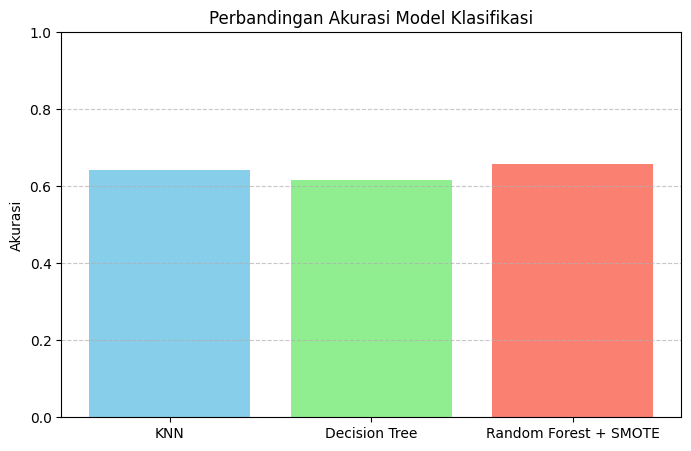

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(df_akurasi['Model'], df_akurasi['Akurasi'], color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model Klasifikasi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Setelah dilakukan serangkaian percobaan dengan beberapa algoritma klasifikasi, diperoleh hasil performa dari tiga model berbeda, yaitu K-Nearest Neighbors (KNN), Decision Tree, dan Random Forest (dengan teknik pelatihan tambahan). Evaluasi dilakukan berdasarkan nilai akurasi prediksi terhadap data uji.  

**Kesimpulan:**  
Random Forest + SMOTE memberi hasil terbaik (65%)  
Berdasarkan hasil evaluasi, Random Forest adalah model terbaik yang digunakan dalam proses klasifikasi Chronic Kidney Disease pada dataset ini. Meskipun perbedaan akurasinya tidak terlalu besar dibandingkan KNN, konsistensi dan kestabilan model Random Forest memberikan keunggulan yang signifikan. Dengan hasil ini, Random Forest dapat dijadikan model dasar untuk pengembangan selanjutnya.